# Tarea 2. Midiendo rendimiento y riesgo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.maxpixel.net/static/photo/1x/Wall-Street-Dices-Over-Newspaper-Profit-Loss-Risk-2656028.jpg" width="600px" height="400px" />

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea3_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea3_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

In [3]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), y para 15 compañías que compongan dicho índice, durante el periodo comprendido del primero de enero del 2015 hasta el día en que realicen la tarea.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).

In [4]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [29]:
tickers = ['AAPL', 'AMZN', 'AMD', 'BLK', 'CAT', 'COST', 'EBAY','GM','INTC','JNJ', 'NFLX', 'WMT', 'V', 'JPM', 'MSFT', '^GSPC']
df = yf.download(tickers, start="2015-01-01", end="2023-12-31")['Adj Close']
df.head()

[*********************100%%**********************]  16 of 16 completed


,AAPL,AMD,AMZN,BLK,CAT,COST,EBAY,GM,INTC,JNJ,JPM,MSFT,NFLX,V,WMT,^GSPC
Date,,,,,,,,,,,,,,,,
2015-01-02,24.498682,2.67,15.4260,285.276917,71.865204,118.242561,21.925974,27.538443,28.363026,82.477371,49.209690,40.534840,49.848572,62.381386,71.431725,2058.199951
2015-01-05,23.808514,2.66,15.1095,277.895721,68.071732,116.898239,21.742641,27.135326,28.043207,81.901367,47.681992,40.162098,47.311428,61.004395,71.223846,2020.579956
2015-01-06,23.810759,2.63,14.7645,273.577301,67.633690,118.442924,21.461788,27.546339,27.520559,81.498878,46.445652,39.572620,46.501431,60.611294,71.772652,2002.609985
2015-01-07,24.144642,2.58,14.9210,279.367096,68.681847,120.505402,21.426680,28.328867,28.097807,83.298065,46.516510,40.075397,46.742859,61.423374,73.676956,2025.900024
2015-01-08,25.072327,2.61,15.0230,282.629913,69.385757,121.540718,22.003990,28.613420,28.620447,83.953003,47.555981,41.254353,47.779999,62.247200,75.231979,2062.139893


<Axes: xlabel='Date'>

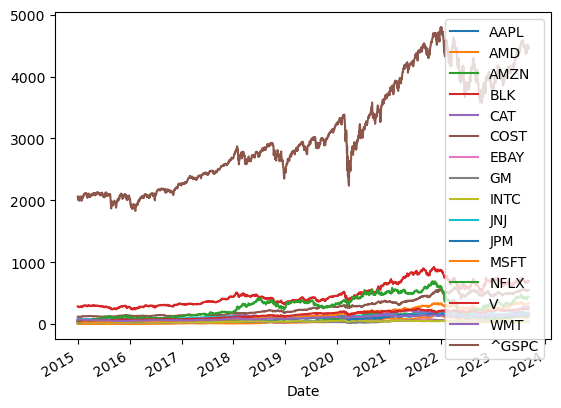

In [30]:
df.plot()

## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [31]:
### Calculamos 
rt = df.pct_change().dropna()
rt.head()

,AAPL,AMD,AMZN,BLK,CAT,COST,EBAY,GM,INTC,JNJ,JPM,MSFT,NFLX,V,WMT,^GSPC
Date,,,,,,,,,,,,,,,,
2015-01-05,-0.028172,-0.003745,-0.020517,-0.025874,-0.052786,-0.011369,-0.008361,-0.014638,-0.011276,-0.006984,-0.031045,-0.009196,-0.050897,-0.022074,-0.002910,-0.018278
2015-01-06,0.000094,-0.011278,-0.022833,-0.015540,-0.006435,0.013214,-0.012917,0.015147,-0.018637,-0.004914,-0.025929,-0.014677,-0.017121,-0.006444,0.007705,-0.008893
2015-01-07,0.014022,-0.019011,0.010600,0.021163,0.015498,0.017413,-0.001636,0.028408,0.020975,0.022076,0.001526,0.012705,0.005192,0.013398,0.026532,0.011630
2015-01-08,0.038422,0.011628,0.006836,0.011679,0.010249,0.008591,0.026944,0.010045,0.018601,0.007863,0.022346,0.029418,0.022188,0.013412,0.021106,0.017888
2015-01-09,0.001072,0.007663,-0.011749,-0.011856,-0.011949,-0.015389,-0.013828,-0.016851,0.001908,-0.013629,-0.017387,-0.008405,-0.015458,-0.014823,-0.012379,-0.008404


<Axes: xlabel='Date'>

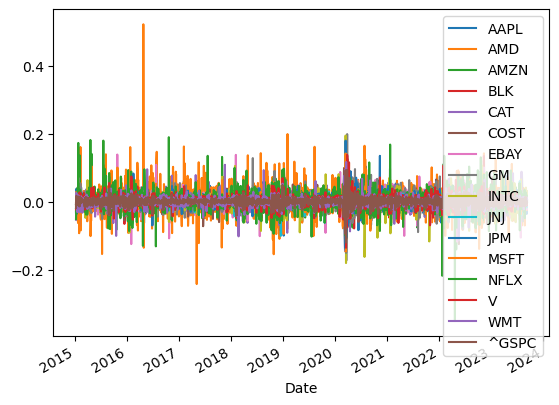

In [32]:
rt.plot()

## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos). 

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [33]:
# Rendimiento anualizado
ra = rt.mean() * 252 # 252 son dias habiles de la bolsa
ra = pd.DataFrame(ra)
ra = ra.rename(columns={0: 'Rendimiento Anualizado'})
ra

,Rendimiento Anualizado
AAPL,0.272139
AMD,0.602121
AMZN,0.308343
BLK,0.141775
CAT,0.203642
COST,0.201693
EBAY,0.125457
GM,0.085343
INTC,0.089613
JNJ,0.093961


In [38]:
print("SIP 500 = ",ra['Rendimiento Anualizado']['^GSPC'])

SIP 500 =  0.10631095000160759


In [42]:
import numpy as np # Volatilidad anualizada
ra['Volatilidad anualizada'] = np.sqrt(rt.var() * 252)
ra

,Rendimiento Anualizado,Volatilidad anualizada
AAPL,0.272139,0.293916
AMD,0.602121,0.602676
AMZN,0.308343,0.333601
BLK,0.141775,0.282166
CAT,0.203642,0.302334
COST,0.201693,0.219308
EBAY,0.125457,0.304961
GM,0.085343,0.359667
INTC,0.089613,0.333376
JNJ,0.093961,0.184914


In [44]:
print("SIP 500 = ",ra['Volatilidad anualizada']['^GSPC'])

SIP 500 =  0.18492574207306783


## 4. Gráfico rendimientos esperados vs. volatilidad (40 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (específicamente acerca de $\beta_0$ y $\beta_1$) (20 puntos).

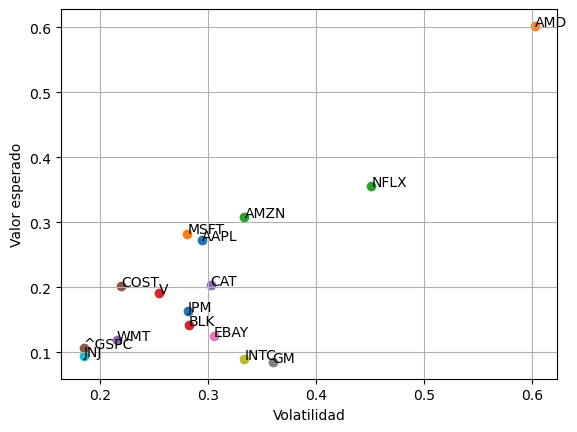

In [51]:
for i in range(len(ra)):
    flag_ra = ra.iloc[i]
    name = ra.index[i]
    plt.scatter(flag_ra['Volatilidad anualizada'],flag_ra['Rendimiento Anualizado'])
    plt.text(flag_ra['Volatilidad anualizada'],flag_ra['Rendimiento Anualizado'], name)
plt.xlabel("Volatilidad")
plt.ylabel("Valor esperado")
plt.grid()

In [52]:
from sklearn import linear_model

In [53]:
#Obten variable dependiente y variable independiente
X = ra[['Volatilidad anualizada']]
y = ra[['Rendimiento Anualizado']]

In [54]:
model = linear_model.LinearRegression()

In [55]:
# Entrena el modelo
model.fit(X, y)

LinearRegression()

In [56]:
# ¿Cuál es el intercepto?
model.intercept_

array([-0.10353387])

In [57]:
# ¿Cuál es el coeficiente?
model.coef_

array([[1.02332637]])

In [59]:
ra['modelo1'] = -0.10353387 + 1.02332637*ra['Volatilidad anualizada']

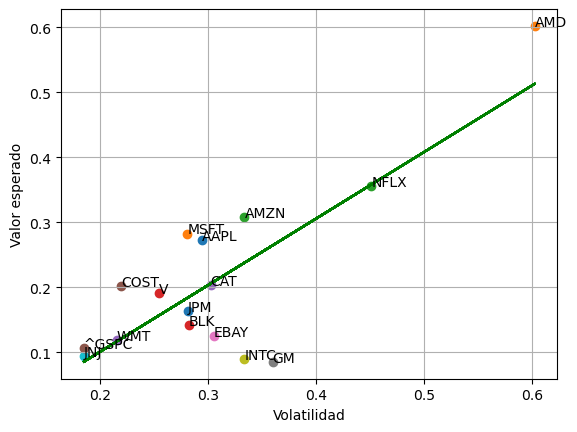

In [60]:
for i in range(len(ra)):
    flag_ra = ra.iloc[i]
    name = ra.index[i]
    plt.scatter(flag_ra['Volatilidad anualizada'],flag_ra['Rendimiento Anualizado'])
    plt.text(flag_ra['Volatilidad anualizada'],flag_ra['Rendimiento Anualizado'], name)
    plt.plot(ra['Volatilidad anualizada'], ra.modelo1, label="modelo", c="g")
plt.xlabel("Volatilidad")
plt.ylabel("Valor esperado")
plt.grid()

In [61]:
ra.corr()

,Rendimiento Anualizado,Volatilidad anualizada,modelo1
Rendimiento Anualizado,1.000000,0.794611,0.794611
Volatilidad anualizada,0.794611,1.000000,1.000000
modelo1,0.794611,1.000000,1.000000


#### Despues de ver la grafica de las volatilidades con los rendimientos podemos ver que si existe una relación entre la volatilidad y el rendimiento también lo podemos ver cuando calculamos la correlación de ambas variables y nos resulta que el 80% de las veces que aumenta la volatilidad tambien aumenta el rendimietno.

#### Los casos de error de el modelo son GM y INTC estos son las acciones que más error tuvieron con el modelo mientras que CAT y NFLX son las acciones que más se acercaron al modelo, por lo que el modelo es bueno pero no es aplicable para todas las acciones. 